In [1]:
from movie_recommender_class import MovieRecommender
from movie_recommender_service_class import MovieRecommenderServiceClass
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.logging.set_verbosity(tf.logging.ERROR)

2023-12-11 22:06:09.577305: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
non-resource variables are not supported in the long term


## Movie recommender service

In [21]:
!python movie_recommendation_service.py
## Example links:
# http://localhost:8786/recommend?movie_name=Aladdin
# http://localhost:8786/recommend?movie_name=Lion%20King
# http://localhost:8786/stats

2023-12-11 22:07:16.204391: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
non-resource variables are not supported in the long term
2023-12-11 22:07:19.536693: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
starting server...
 * Serving Flask app 'movie_recommendation_service'
 * Debug mode: off
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8786
 * Running on http://10.0.0.21:8786
Press CTRL+C to quit
127.0.0.1 - - [11/Dec/2023 22:08:31] "GET /recommend?movie_name=Lion%20King HTTP/1.1" 200 -
127.0.0.1 - - [11/Dec/2023 22:08:39] "GET /recommend?movie_name=Aladdin HTTP/1.1" 200 -
^C


## Instantiate the MovieRecommender class

In [3]:
recommender = MovieRecommender()

In [4]:
recommender.movies.head()

,movie_id,title,release_date,video_release_date,imdb_url,genre_unknown,Action,Adventure,Animation,Children,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,genre,all_genres
0,0,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,1995,Children,Animation-Children-Comedy
1,1,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,1,0,0,1995,Adventure,Action-Adventure-Thriller
2,2,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,1,0,0,1995,Thriller,Thriller
3,3,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,1995,Comedy,Action-Comedy-Drama
4,4,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,1,0,0,1995,Drama,Crime-Drama-Thriller


In [5]:
recommender.ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,195,241,3.0,881250949
1,185,301,3.0,891717742
2,21,376,1.0,878887116
3,243,50,2.0,880606923
4,165,345,1.0,886397596


In [6]:
recommender.users.head()

,user_id,age,sex,occupation,zip_code
0,0,24,M,technician,85711
1,1,53,F,other,94043
2,2,23,M,writer,32067
3,3,24,M,technician,43537
4,4,33,F,other,15213


In [7]:
recommender.full_movie_user_df.head()

,user_id,movie_id,rating,unix_timestamp,title,release_date,video_release_date,imdb_url,genre_unknown,Action,...,Thriller,War,Western,year,genre,all_genres,age,sex,occupation,zip_code
0,195,241,3.0,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,1997,Comedy,Comedy,49,M,writer,55105
1,195,256,2.0,881251577,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,1,...,0,0,0,1997,Sci-Fi,Action-Adventure-Comedy-Sci-Fi,49,M,writer,55105
2,195,110,4.0,881251793,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Truth%20About...,0,0,...,0,0,0,1996,Romance,Comedy-Romance,49,M,writer,55105
3,195,24,4.0,881251955,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,0,...,0,0,0,1996,Comedy,Comedy,49,M,writer,55105
4,195,381,4.0,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Adventures%20...,0,0,...,0,0,0,1994,Drama,Comedy-Drama,49,M,writer,55105


## Explore the movielens data

### Users

In [8]:
recommender.users.describe(include=object)

,user_id,sex,occupation,zip_code
count,943,943,943,943
unique,943,2,21,795
top,0,M,student,55414
freq,1,670,196,9


In [9]:
# Count the occurrences of each occupation
occup_counts = recommender.users['occupation'].value_counts()

# Summarize user rating info
user_ratings_summary = recommender.ratings.groupby('user_id', as_index=False).agg({'rating': ['count','mean']})
user_ratings_summary.head()

user_id rating          
           count      mean
0       0    272  3.610294
1       1     62  3.709677
2      10    181  3.464088
3     100     67  2.895522
4     101    216  2.615741

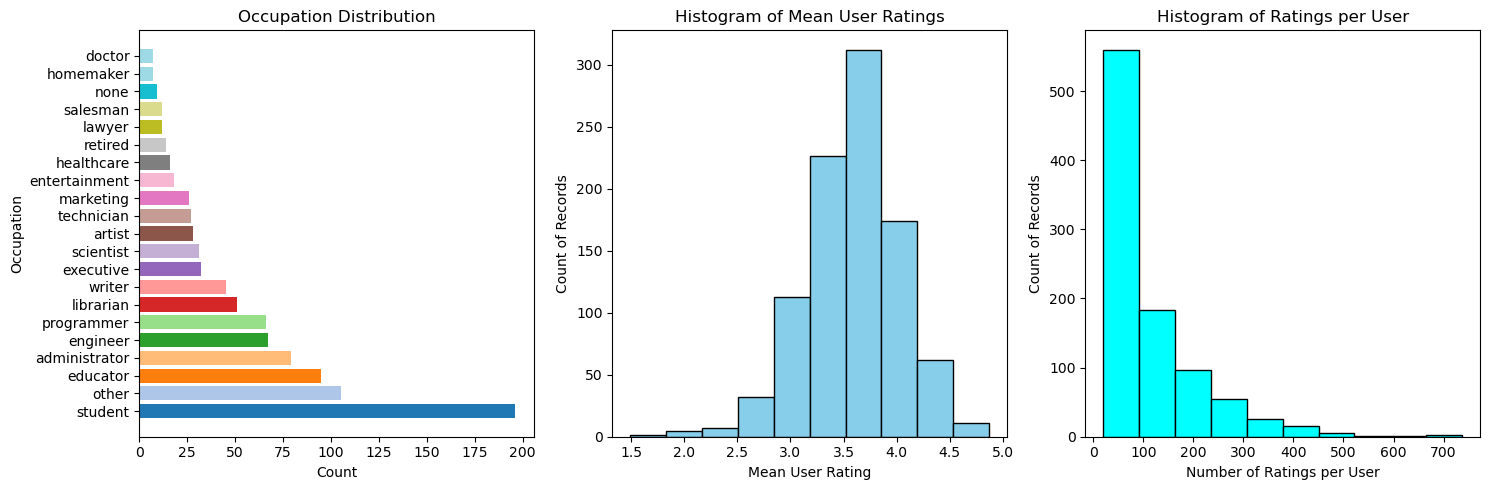

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Bar graph for Occupation Distribution
colors = plt.colormaps['tab20'](range(len(occup_counts)))
axs[0].barh(occup_counts.index, occup_counts, color=colors)
axs[0].set_title('Occupation Distribution')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Occupation')

# Histogram for Mean User Ratings
axs[1].hist(user_ratings_summary[('rating',  'mean')], bins=10, color='skyblue', edgecolor='black')
axs[1].set_title('Histogram of Mean User Ratings')
axs[1].set_xlabel('Mean User Rating')
axs[1].set_ylabel('Count of Records')

# Histogram for Number of Ratings per User
axs[2].hist(user_ratings_summary[('rating',  'count')], bins=10, color='cyan', edgecolor='black')
axs[2].set_title('Histogram of Ratings per User')
axs[2].set_xlabel('Number of Ratings per User')
axs[2].set_ylabel('Count of Records')

plt.tight_layout()
plt.show()

### Movies

In [11]:
# Count the occurrences of genres
genre_counts = recommender.full_movie_user_df['genre'].value_counts()

# Summarize movie info
movie_rating_summary = recommender.full_movie_user_df.groupby('movie_id', 
                                as_index=False).agg({'rating': ['count', 'mean']})
movie_rating_summary.head()

movie_id rating          
            count      mean
0        0    452  3.878319
1        1    131  3.206107
2       10    236  3.847458
3      100     73  3.260274
4     1000     17  2.000000

### Top 10 most watched movies

In [12]:
movie_rating_summary_flattened = movie_rating_summary.copy()
movie_rating_summary_flattened.columns = ['movie_id','rating_count','rating_mean']
movie_ratings = recommender.movies.merge(movie_rating_summary_flattened, on='movie_id')

movie_ratings[['title', 'rating_count', 'rating_mean']].sort_values('rating_count', ascending=False).head(10)

,title,rating_count,rating_mean
49,Star Wars (1977),583,4.358491
257,Contact (1997),509,3.803536
99,Fargo (1996),508,4.155512
180,Return of the Jedi (1983),507,4.007890
293,Liar Liar (1997),485,3.156701
285,"English Patient, The (1996)",481,3.656965
287,Scream (1996),478,3.441423
0,Toy Story (1995),452,3.878319
299,Air Force One (1997),431,3.631090
120,Independence Day (ID4) (1996),429,3.438228


### Top 10 highly rated movies

In [13]:
filtered_movies = movie_ratings[movie_ratings['rating_count'] > 20]

# Sort the filtered DataFrame by 'rating_mean' in descending order and take the top 10
filtered_movies[['title', 'rating_count', 'rating_mean']].sort_values('rating_mean', ascending=False).head(10)

,title,rating_count,rating_mean
407,"Close Shave, A (1995)",112,4.491071
317,Schindler's List (1993),298,4.466443
168,"Wrong Trousers, The (1993)",118,4.466102
482,Casablanca (1942),243,4.456790
113,Wallace & Gromit: The Best of Aardman Animatio...,67,4.447761
63,"Shawshank Redemption, The (1994)",283,4.445230
602,Rear Window (1954),209,4.387560
11,"Usual Suspects, The (1995)",267,4.385768
49,Star Wars (1977),583,4.358491
177,12 Angry Men (1957),125,4.344000


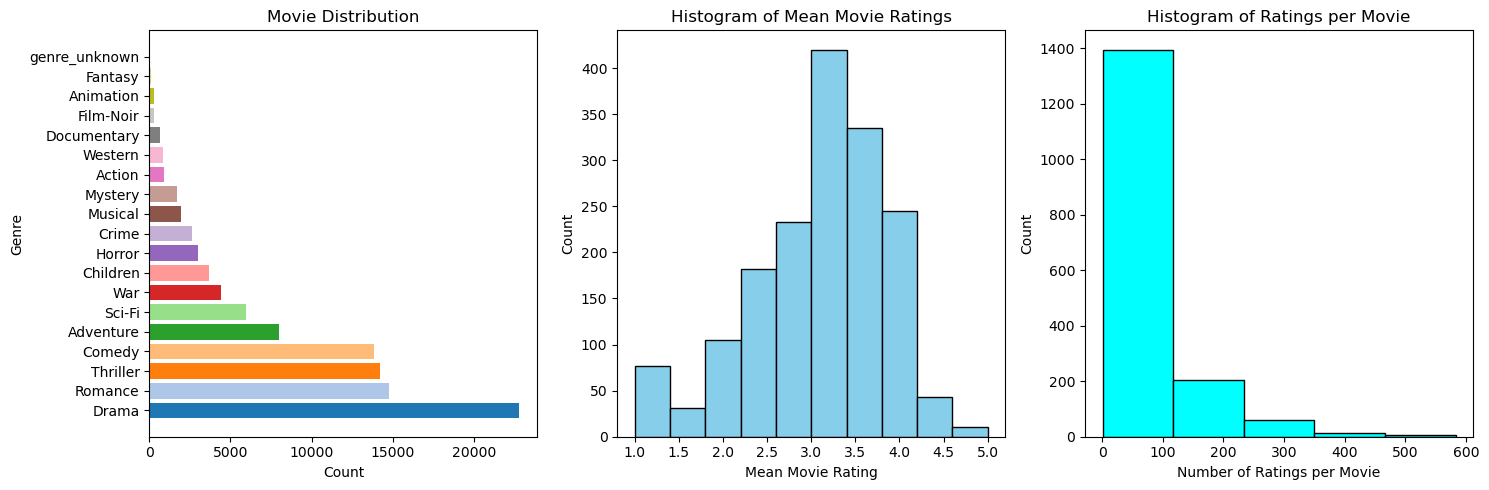

In [14]:
# Plot 
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Bar graph for Occupation Distribution
colors = plt.colormaps['tab20'](range(len(genre_counts)))
axs[0].barh(genre_counts.index, genre_counts, color=colors)
axs[0].set_title('Movie Distribution')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Genre')

# Histogram for Mean User Ratings
axs[1].hist(movie_rating_summary[('rating',  'mean')], bins=10, color='skyblue', edgecolor='black')
axs[1].set_title('Histogram of Mean Movie Ratings')
axs[1].set_xlabel('Mean Movie Rating')
axs[1].set_ylabel('Count')

# Histogram for Number of Ratings per User
axs[2].hist(movie_rating_summary[('rating',  'count')], bins=5, color='cyan', edgecolor='black')
axs[2].set_title('Histogram of Ratings per Movie')
axs[2].set_xlabel('Number of Ratings per Movie')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Matrix Factorization Model

2023-12-11 22:06:15.723433: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


 iteration 1000: train_error=0.377528, test_error=1.345885

[{'train_error': 0.37752846, 'test_error': 1.3458854}]

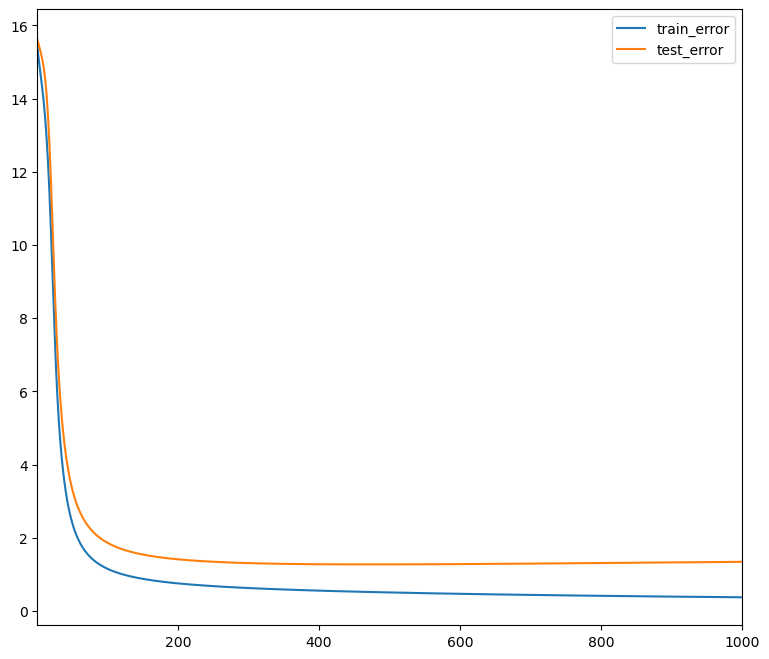

In [15]:
model = recommender.build_model(embedding_dim=30, init_stddev=0.5) # CFmodel class
model.train(num_iterations=1000, learning_rate=10., plot_results=True)

## Regularized Matrix Factorization Model
I will add regularization terms that will address this issue. I will use two types of regularization:
- Regularization of the model parameters. This is a common $\ell_2$ regularization term on the embedding matrices, given by $r(U, V) =  \frac{1}{N} \sum_i \|U_i\|^2 + \frac{1}{M}\sum_j \|V_j\|^2$.
- A global prior that pushes the prediction of any pair towards zero, called the *gravity* term. This is given by $g(U, V) = \frac{1}{MN} \sum_{i = 1}^N \sum_{j = 1}^M \langle U_i, V_j \rangle^2$.

The total loss is then given by
$$
\frac{1}{|\Omega|}\sum_{(i, j) \in \Omega} (A_{ij} - \langle U_i, V_j\rangle)^2 + \lambda _r r(U, V) + \lambda_g g(U, V)
$$
where $\lambda_r$ and $\lambda_g$ are two regularization coefficients (hyper-parameters).

 iteration 2000: train_error_observed=1.003157, test_error_observed=2.420006, observed_loss=1.003157, regularization_loss=0.851920, gravity_loss=1.3164395

[{'train_error_observed': 1.0031569, 'test_error_observed': 2.4200058},
 {'observed_loss': 1.0031569,
  'regularization_loss': 0.8519198,
  'gravity_loss': 1.3164394}]

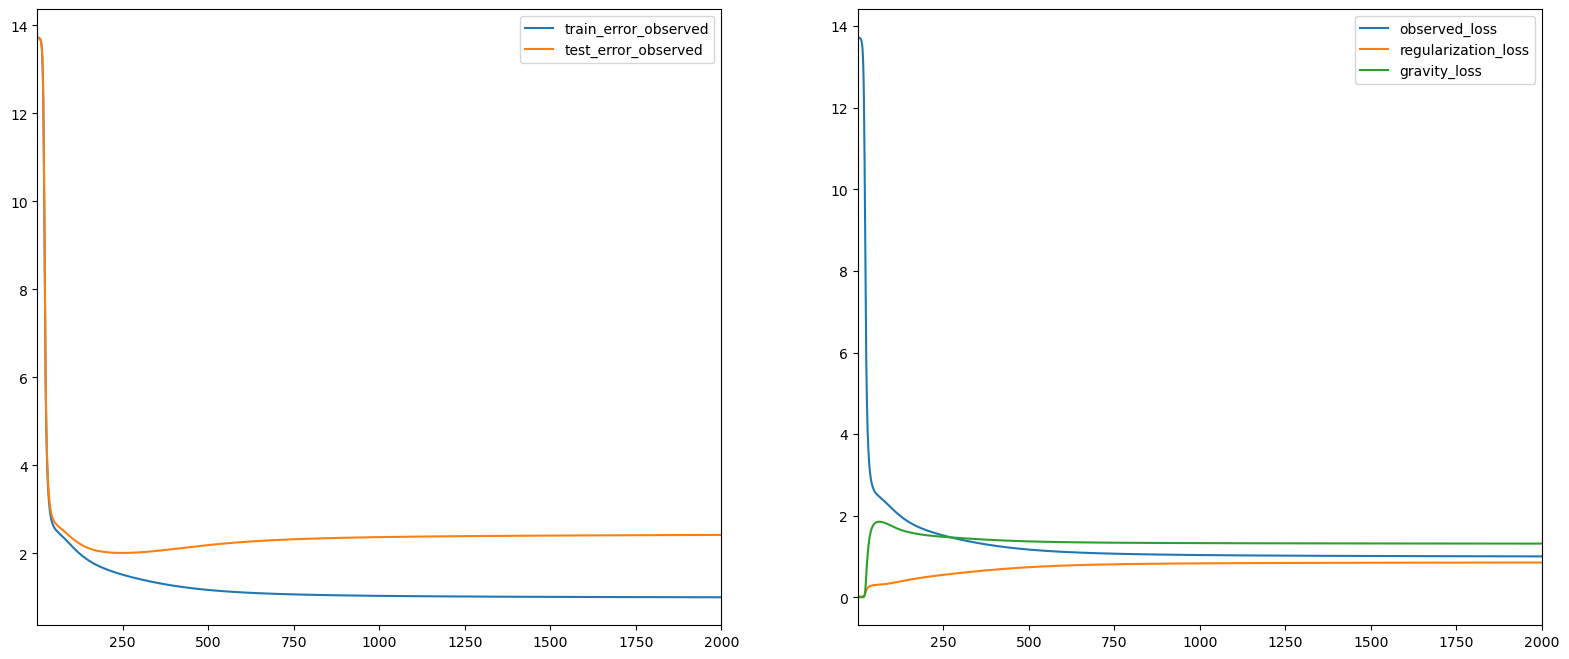

In [16]:
reg_model = recommender.build_regularized_model(
    regularization_coeff=0.1, gravity_coeff=1.0, embedding_dim=35,
    init_stddev=.05)
reg_model.train(num_iterations=2000, learning_rate=20., plot_results=True)

## Compare the recommendations made by the models
There are different similarity measures we can use, and these can yield different results. I will compare the following:
- dot product: the score of item j is $\langle u, V_j \rangle$.
- cosine: the score of item j is $\frac{\langle u, V_j \rangle}{\|u\|\|V_j\|}$.


### Unregularized model

In [17]:
recommender.movie_neighbors(model, "Aladdin", 'dot')
recommender.movie_neighbors(model, "Aladdin", 'cosine')

Nearest neighbors of : Aladdin (1992).
[Found more than one matching movie. Other candidates: Aladdin and the King of Thieves (1996)]


,dot score,titles,genres
125,5.470166,"Spitfire Grill, The (1996)",Drama
271,5.229091,Good Will Hunting (1997),Drama
142,5.015749,"Sound of Music, The (1965)",Musical
27,4.994141,Apollo 13 (1995),Action-Drama-Thriller
515,4.898581,Local Hero (1983),Comedy
735,4.885306,Shadowlands (1993),Drama-Romance


Nearest neighbors of : Aladdin (1992).
[Found more than one matching movie. Other candidates: Aladdin and the King of Thieves (1996)]


,cosine score,titles,genres
27,0.866811,Apollo 13 (1995),Action-Drama-Thriller
70,0.852360,"Lion King, The (1994)",Animation-Children-Musical
124,0.842454,Phenomenon (1996),Drama-Romance
0,0.839025,Toy Story (1995),Animation-Children-Comedy
203,0.834571,Back to the Future (1985),Comedy-Sci-Fi
209,0.800410,Indiana Jones and the Last Crusade (1989),Action-Adventure


### Regularized model

In [18]:
recommender.movie_neighbors(reg_model, "Aladdin", 'dot')
recommender.movie_neighbors(reg_model, "Aladdin", 'cosine')

Nearest neighbors of : Aladdin (1992).
[Found more than one matching movie. Other candidates: Aladdin and the King of Thieves (1996)]


,dot score,titles,genres
70,9.109585,"Lion King, The (1994)",Animation-Children-Musical
587,8.064263,Beauty and the Beast (1991),Animation-Children-Musical
0,7.627830,Toy Story (1995),Animation-Children-Comedy
63,7.617884,"Shawshank Redemption, The (1994)",Drama
21,7.546445,Braveheart (1995),Action-Drama-War
317,7.466617,Schindler's List (1993),Drama-War


Nearest neighbors of : Aladdin (1992).
[Found more than one matching movie. Other candidates: Aladdin and the King of Thieves (1996)]


,cosine score,titles,genres
70,0.935048,"Lion King, The (1994)",Animation-Children-Musical
587,0.858445,Beauty and the Beast (1991),Animation-Children-Musical
81,0.803083,Jurassic Park (1993),Action-Adventure-Sci-Fi
27,0.719131,Apollo 13 (1995),Action-Drama-Thriller
203,0.699201,Back to the Future (1985),Comedy-Sci-Fi
495,0.695041,It's a Wonderful Life (1946),Drama


## Compare learned embedding in regularized and unregularized models

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1682 samples in 0.001s...
[t-SNE] Computed neighbors for 1682 samples in 0.084s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1682
[t-SNE] Computed conditional probabilities for sample 1682 / 1682
[t-SNE] Mean sigma: 0.180667
[t-SNE] KL divergence after 50 iterations with early exaggeration: 57.328072
[t-SNE] KL divergence after 400 iterations: 2.715491


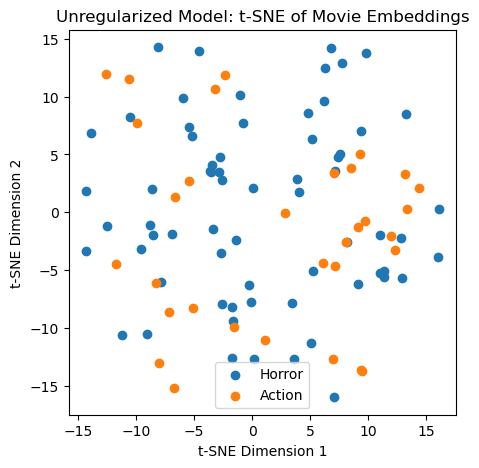

In [19]:
selected_categories = ['Horror',  'Action']
recommender.movie_tsne(model)
recommender.plt_tsne(selected_categories, reg=False)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1682 samples in 0.001s...
[t-SNE] Computed neighbors for 1682 samples in 0.081s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1682
[t-SNE] Computed conditional probabilities for sample 1682 / 1682
[t-SNE] Mean sigma: 0.221178
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.321182
[t-SNE] KL divergence after 400 iterations: 1.594358


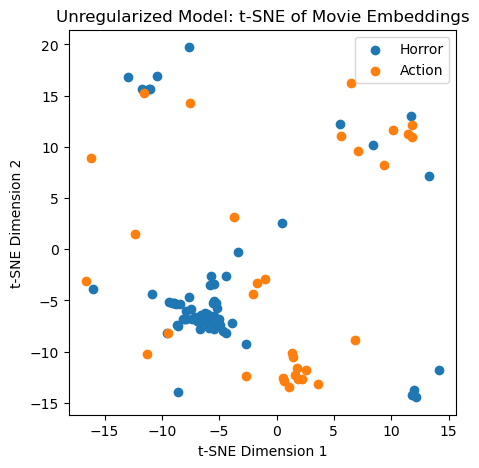

In [20]:
selected_categories = ['Horror',  'Action']
recommender.movie_tsne(reg_model)
recommender.plt_tsne(selected_categories, reg=False)

## Summary of results
### Exploratory analysis
- From the user profiles, we can see that most users who rated movies are students. Each user on average, rated 100 movies. The mean of their rating scores is 3.5.
- Most movies in this dataset are drama. Each movie has on average 80 ratings.

### Models' performances
#### The recommendation system is built based on collaborative filtering. Specifically, matrix factorization technique is used to factorize the rating matrix into movie and user embeddings.
- Two models were considered, one with regularization, and one without regularization**. The regularization includes the common $\ell_2$ regularization. In addition, it has a gravity term that resembles the observed term in a weighted matrix factorization but is simplified. The two models are compared concerning the quality of their recommendations and the structures of the movie embeddings. 
    - The test loss for an unregularized model is lower than a regularized model. However, the unregularized model did not recommend movies that seem relevant to the query movie. This is because the unregularized model does not learn how to place the embeddings of irrelevant movies.
    - Using Aladdin as a test, the movie recommended by a regularized movie is closer to what we expect a person who likes Aladdin to enjoy. Although different similarity measures, e.g. dot product or cosine lead to slightly different suggestions, overall, **regardless of similarity measures, the movies recommended by a regularized matrix factorization model are acceptable**. 
    - Looking at the visualization of the movie embeddings, we can see **a regularized matrix factorization model has a more structured embedding**. Movies with different categories tend to cluster together in a regularized model, compared to being scattered everywhere in an unregularized model.

### Conclusion
- In this project, I explored a collaborative-filtering-based recommendation system. With a new and simplified regularization, the model's recommendation power was enhanced. 

## References

- Dataset: MovieLens https://grouplens.org/datasets/movielens/
- Collaborative filtering: 
    - https://pub.towardsai.net/step-by-step-approach-to-building-a-recommendation-system-a65be5a54045  
    - https://developers.google.com/machine-learning/recommendation/collaborative/matrix 
- Matrix factorization: 
    - https://developers.google.com/machine-learning/recommendation/collaborative/matrix 
    - https://medium.com/sfu-cspmp/recommendation-systems-collaborative-filtering-using-matrix-factorization-simplified-2118f4ef2cd3